In [1]:
import numpy as np

#Mock data

data = np.array([
    #(<height>, <pounds>)
    (60,120),
    (65,130),
    (62,125),
    (70, 140),
    (75, 145)   
])

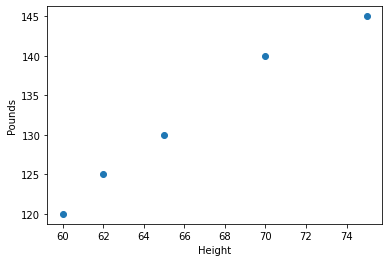

In [2]:
from matplotlib import pyplot as plt
plt.xlabel("Height")
plt.ylabel("Pounds")
plt.scatter(data[:,0], data[:,1])

The relationship between pounds and height is linear so there is an equation weight = w*height + b that should fit the data well. What is w and b? 

In [3]:
def findWeights(data, epochs = 3, lr = 0.00001):
    w = 0
    b = 0
    x = data[:,0]     #height
    y = data[:,1]     #weight
    
    history = {
        "weights":[w],
        "biases":[b],
        "error":[],
        "weightGradients":[],
        "biasGradients":[]
    }
    for epochs in range(epochs):
        print("EPOCH "+ str(epochs)+":")
        for i in range(len(data)):
            yPred = predictY(x[i], w, b)
            yActual = y[i]
            
            error = (yPred - yActual)**2
            
            dedw = 2*(yPred - yActual)*x[i]
            dedb = 2*(yPred - yActual)*1
            
            w = w - dedw*lr
            b = b - dedb*lr
            print("   Sample "+ str(i+1))
            print("      y Prediction: "+ str(yPred))
            print("      y Actual    : "+ str(yActual))
            print("      SSE         : "+ str(error))
            
            history["weights"].append(w)
            history["biases"].append(b)
            history["error"].append(error)
            history["weightGradients"].append(dedw)
            history["biasGradients"].append(dedb)
    return history
    
def predictY(x,w,b):
    return w*x+b

In [4]:
history = findWeights(data, epochs = 20)

EPOCH 0:
   Sample 1
      y Prediction: 0
      y Actual    : 120
      SSE         : 14400
   Sample 2
      y Prediction: 9.362400000000001
      y Actual    : 130
      SSE         : 14553.430533759998
   Sample 3
      y Prediction: 18.656203312000002
      y Actual    : 125
      SSE         : 11309.003094018679
   Sample 4
      y Prediction: 30.29560278045216
      y Actual    : 140
      SSE         : 12035.054769304337
   Sample 5
      y Prediction: 43.98023451591468
      y Actual    : 145
      SSE         : 10204.993018459598
EPOCH 1:
   Sample 1
      y Prediction: 44.27981364478474
      y Actual    : 120
      SSE         : 5733.546621668527
   Sample 2
      y Prediction: 53.87655754535171
      y Actual    : 130
      SSE         : 5794.778491146149
   Sample 3
      y Prediction: 57.52760382848683
      y Actual    : 125
      SSE         : 4552.5242451256245
   Sample 4
      y Prediction: 70.80664279244894
      y Actual    : 140
      SSE         : 4787.720681651

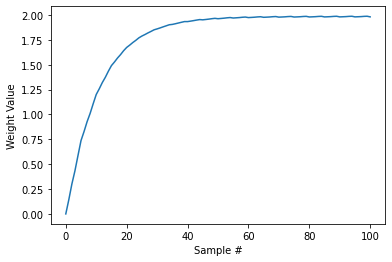

In [5]:
plt.xlabel("Sample #")
plt.ylabel("Weight Value")
plt.plot(history["weights"])

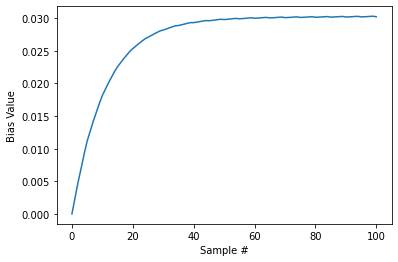

In [6]:
plt.xlabel("Sample #")
plt.ylabel("Bias Value")
plt.plot(history["biases"])

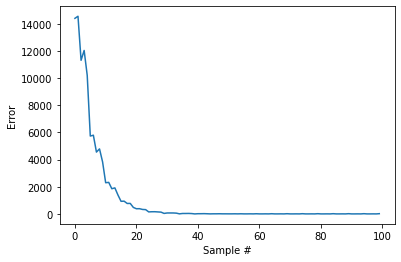

In [7]:
plt.xlabel("Sample #")
plt.ylabel("Error")
plt.plot(history["error"])

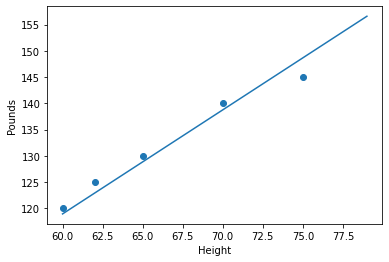

In [8]:
finalWeight = history["weights"][-1]
finalBias = history["biases"][-1]


x = np.arange(60,80)
yPred = np.arange(60,80)*finalWeight+finalBias

plt.plot(x,yPred)
plt.scatter(data[:,0], data[:,1])
plt.xlabel("Height")
plt.ylabel("Pounds")
plt.show()

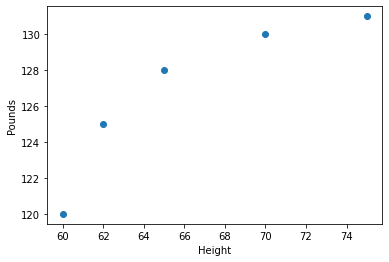

In [9]:
data = np.array([
    #(<height>, <weight>)
    (60,120),
    (65,128),
    (62,125),
    (70, 130),
    (75, 131)   
])
plt.xlabel("Height")
plt.ylabel("Pounds")
plt.scatter(data[:,0], data[:,1])

What happens with non-linear data?

In [11]:
history2 = findWeights(data, epochs = 30)

EPOCH 0:
   Sample 1
      y Prediction: 0
      y Actual    : 120
      SSE         : 14400
   Sample 2
      y Prediction: 9.362400000000001
      y Actual    : 128
      SSE         : 14074.880133759998
   Sample 3
      y Prediction: 18.494963312000003
      y Actual    : 125
      SSE         : 11343.322839912224
   Sample 4
      y Prediction: 30.127561637252157
      y Actual    : 130
      SSE         : 9974.503944520868
   Sample 5
      y Prediction: 42.767640741573544
      y Actual    : 131
      SSE         : 7784.949220308033
EPOCH 1:
   Sample 1
      y Prediction: 42.15856963400259
      y Actual    : 120
      SSE         : 6059.288281424424
   Sample 2
      y Prediction: 51.74408342160075
      y Actual    : 128
      SSE         : 5814.964813211785
   Sample 3
      y Prediction: 55.50421103256788
      y Actual    : 125
      SSE         : 4829.66468420586
   Sample 4
      y Prediction: 68.69789531935812
      y Actual    : 130
      SSE         : 3757.94803827637

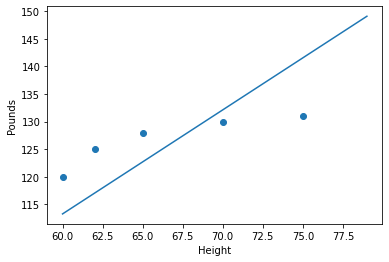

In [12]:
finalWeight = history2["weights"][-1]
finalBias = history2["biases"][-1]


x = np.arange(60,80)
yPred = np.arange(60,80)*finalWeight+finalBias

plt.plot(x,yPred)
plt.scatter(data[:,0], data[:,1])
plt.xlabel("Height")
plt.ylabel("Pounds")
plt.show()